Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [2]:
df = pd.read_csv('cian.csv')
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,Ваш Вариант,real_estate_agent,https://tula.cian.ru/sale/flat/301471458/,Бекасово,sale,flat,5,5,2,44.7,...,-1,-1,6 м²,79156804591,"2,7 м",Новомосковск,Маяковского,4,NaN,NaN
1,РИСАН,developer,https://penza.cian.ru/sale/flat/291733097/,Бекасово,sale,flat,1,17,1,36.5,...,Предчистовая,"9,1 м²","17,7 м²",78412596227,"2,72 м",Октябрьский,Минская,25,NaN,Соседи
2,Инстеп,developer,https://lipetsk.cian.ru/sale/flat/301354160/,Бекасово,sale,flat,8,18,1,30.76,...,"Черновая, чистовая",-1,-1,74742998132,"2,64 м",Липецк,Механизаторов,15А,NaN,Инстеп.Механизаторов
3,Аякс,real_estate_agent,https://perm.cian.ru/sale/flat/304380195/,Бекасово,sale,flat,2,5,1,29.8,...,-1,"18,2 м²","4,7 м²",79655748105,-1,Свердловский,Героев Хасана,19,NaN,NaN
4,Северная Компания,developer,https://ryazan.cian.ru/sale/flat/298206155/,Бекасово,sale,flat,2,21,1,25.08,...,"Без отделки, предчистовая","17,6 м²",-1,73832079764,"2,76 м",Московский,4-й мкр,4-й мкр,NaN,Тринити


Удаляем лишние колонки

In [3]:
columns_to_remove = ['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'residential_complex']  
df.drop(columns=columns_to_remove, inplace=True)

df.to_csv('updated_file.csv', index=False)

In [4]:
df = pd.read_csv('updated_file.csv')
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground
0,Бекасово,5,5,2,44.7,2850000,1965,Вторичка,1 балкон,Наземная,-1,-1,-1,-1,6 м²,"2,7 м",Новомосковск,Маяковского,NaN
1,Бекасово,1,17,1,36.5,3175500,2026,Новостройка,-1,-1,-1,-1,Предчистовая,"9,1 м²","17,7 м²","2,72 м",Октябрьский,Минская,NaN
2,Бекасово,8,18,1,30.76,3199040,2026,Новостройка,1 лоджия,-1,Панельный,-1,"Черновая, чистовая",-1,-1,"2,64 м",Липецк,Механизаторов,NaN
3,Бекасово,2,5,1,29.8,3350000,-1,Вторичка,-1,-1,-1,-1,-1,"18,2 м²","4,7 м²",-1,Свердловский,Героев Хасана,NaN
4,Бекасово,2,21,1,25.08,3401800,2026,Новостройка,-1,-1,Монолитно-кирпичный,-1,"Без отделки, предчистовая","17,6 м²",-1,"2,76 м",Московский,4-й мкр,NaN


Ищем и удаляем дубликаты

In [5]:
num_duplicates = df.duplicated().sum()
print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 724


In [6]:
df.drop_duplicates(inplace=True)
print(f'Data after dropping duplicated values has {df.shape[0]} rows ') 

df.to_csv('updated2_file.csv', index=False)

Data after dropping duplicated values has 5854 rows 


Смотрим и меняем тип данных

In [7]:
df = pd.read_csv('updated2_file.csv')

print(df.shape)
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

(5854, 19)
location                object
floor                   object
floors_count            object
rooms_count             object
total_meters            object
price                   object
year_of_construction    object
object_type             object
have_loggia             object
parking_type            object
house_material_type     object
heating_type            object
finish_type             object
living_meters           object
kitchen_meters          object
ceiling_height          object
district                object
street                  object
underground             object
dtype: object
[]


In [8]:
print("Unique values in floor\n",df['floor'].unique())
df['floor'][df['floor'] == '-']

Unique values in floor
 ['5' '1' '8' '2' '7' '4' '6' '13' '9' '25' '18' '22' '14' '17' '3' '10'
 '12' '19' '15' '27' '31' '38' '59' '40' '11' '26' '20' '21' '24' '29'
 '16' '23' '36' '47' '82' '33' '46' '34' nan '30' '39' '75' '79' 'floor'
 '66' '57' '60' '35' '51' '28']


Series([], Name: floor, dtype: object)

In [9]:
df['floor'] = df['floor'].replace('floor', np.nan)
df['floor'] = df['floor'].astype(float).astype('Int64')
df['floor']

0        5
1        1
2        8
3        2
4        2
        ..
5849     8
5850    19
5851     3
5852     3
5853     3
Name: floor, Length: 5854, dtype: Int64

In [10]:
print("Unique values in floors_count\n",df['floors_count'].unique())
df['floors_count'][df['floors_count'] == '-']

Unique values in floors_count
 ['5' '17' '18' '21' '8' '24' '15' '12' '16' '25' '26' '30' '19' '20' '7'
 '6' '9' '22' '10' '2' '23' '31' '27' '41' '42' '44' '67' '63' '11' '4'
 '3' '14' '13' '28' '48' '47' '40' '29' '32' '45' '36' '55' '85' '56' '35'
 '34' '49' '39' '59' '46' nan '79' '43' '95' '97' '33' '65' '68' '64' '75'
 '37' 'floors_count' '1' '66']


Series([], Name: floors_count, dtype: object)

In [11]:
df['floors_count'] = df['floors_count'].replace('floors_count', np.nan)
df['floors_count'] = df['floors_count'].astype(float).astype('Int64')
df['floors_count']

0        5
1       17
2       18
3        5
4       21
        ..
5849    14
5850    25
5851     5
5852     6
5853    16
Name: floors_count, Length: 5854, dtype: Int64

In [12]:
print("Unique values in price\n",df['price'].unique())
df['price'][df['price'] == '-']

Unique values in price
 ['2850000' '3175500' '3199040' ... '9865233' '8607014' '13014356']


Series([], Name: price, dtype: object)

In [13]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price']

0        2850000.0
1        3175500.0
2        3199040.0
3        3350000.0
4        3401800.0
           ...    
5849    11400000.0
5850     8607014.0
5851     7300000.0
5852     6400000.0
5853    13014356.0
Name: price, Length: 5854, dtype: float64

In [14]:
print("Unique values in year_of_construction\n",df['year_of_construction'].unique())
df['year_of_construction'][df['year_of_construction'] == '-']

Unique values in year_of_construction
 ['1965' '2026' '-1' '1982' '2021' '2023' '2027' '2013' '2025' '2024'
 '1959' '2014' '2018' '2017' '2012' '1986' '1974' '2011' '2016' '1962'
 '1917' '1993' '1963' '1992' '2015' '2004' '2020' 'Напишите автору' '1979'
 '1989' '1967' '1964' '1971' '1975' '2003' '2010' '1961' '1972' '1985'
 '2028' '2022' '2006' '2009' '1970' '2008' '2019' '2005' '1984' '1968'
 '2001' '2007' '1980' '1960' '1957' '1966' '1952' '1977' '1955' '1976'
 '1969' '1900' '1997' '1987' '1973' '1988' '1954' '1978' '1958' '1983'
 '1981' '1999' '1998' '1991' '2000' '2002' '1994' '1995'
 'Позвоните автору' '1996' '1940' '1949' '1990' '1947' '1953' '1910'
 '1901' '1909' '1600' '1951' nan '1902' '1938' '1956' '1948' '1936'
 'year_of_construction' '1931' '1950' '1934' '1928' '1945' '1937' '1927'
 '1896' '1777' '2031' '1935']


Series([], Name: year_of_construction, dtype: object)

In [15]:
df['year_of_construction'] = df['year_of_construction'].replace('year_of_construction', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Напишите автору', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Аукцион', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Позвоните автору', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace(-1, np.nan)

df['year_of_construction'] = df['year_of_construction'].astype(float).astype('Int64')
df['year_of_construction']

0       1965
1       2026
2       2026
3         -1
4       2026
        ... 
5849    2018
5850    2025
5851    1968
5852    2023
5853    2025
Name: year_of_construction, Length: 5854, dtype: Int64

In [16]:
print("Unique values in rooms_count\n",df['rooms_count'].unique())
df['rooms_count'][df['rooms_count'] == '-']

Unique values in rooms_count
 ['2' '1' '3' '-1' '4' nan '5' 'rooms_count']


Series([], Name: rooms_count, dtype: object)

In [17]:
df['rooms_count'] = df['rooms_count'].replace('rooms_count', np.nan)
df['rooms_count'] = df['rooms_count'].replace(-1, np.nan)

df['rooms_count'] = df['rooms_count'].astype(float).astype('Int64')
df['rooms_count']

0       2
1       1
2       1
3       1
4       1
       ..
5849    2
5850    2
5851    2
5852    2
5853    2
Name: rooms_count, Length: 5854, dtype: Int64

In [18]:
print("Unique values in total_meters\n",df['total_meters'].unique())
df['total_meters'][df['total_meters'] == '-']

Unique values in total_meters
 ['44.7' '36.5' '30.76' ... '30.47' '36.79' '48.39']


Series([], Name: total_meters, dtype: object)

In [19]:
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['rooms_count'] = df['rooms_count'].replace(-1, np.nan)

df['total_meters']

0       44.70
1       36.50
2       30.76
3       29.80
4       25.08
        ...  
5849    69.70
5850    48.10
5851    45.00
5852    34.00
5853    58.60
Name: total_meters, Length: 5854, dtype: float64

In [20]:
df.to_csv('updated3_file.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              5853 non-null   object 
 1   floor                 5852 non-null   Int64  
 2   floors_count          5852 non-null   Int64  
 3   rooms_count           5778 non-null   Int64  
 4   total_meters          5852 non-null   float64
 5   price                 5847 non-null   float64
 6   year_of_construction  5808 non-null   Int64  
 7   object_type           5853 non-null   object 
 8   have_loggia           5853 non-null   object 
 9   parking_type          5853 non-null   object 
 10  house_material_type   5853 non-null   object 
 11  heating_type          5853 non-null   object 
 12  finish_type           5853 non-null   object 
 13  living_meters         5853 non-null   object 
 14  kitchen_meters        5853 non-null   object 
 15  ceiling_height       

Находим пропуски и избавляемся от них

In [21]:
df = pd.read_csv('updated3_file.csv')

In [22]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

location - 0%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 0%
year_of_construction - 1%
object_type - 0%
have_loggia - 0%
parking_type - 0%
house_material_type - 0%
heating_type - 0%
finish_type - 0%
living_meters - 0%
kitchen_meters - 0%
ceiling_height - 0%
district - 66%
street - 22%
underground - 30%


Заменяем недостающие значения медианным значением для численных признаков

In [23]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: floors_count
imputing missing values for: rooms_count
imputing missing values for: total_meters
imputing missing values for: price
imputing missing values for: year_of_construction


Заменяем недостающие значения наиболее встречающимся значением для категориальных признаков

In [24]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

imputing missing values for: location
imputing missing values for: object_type
imputing missing values for: have_loggia
imputing missing values for: parking_type
imputing missing values for: house_material_type
imputing missing values for: heating_type


imputing missing values for: finish_type
imputing missing values for: living_meters
imputing missing values for: kitchen_meters
imputing missing values for: ceiling_height
imputing missing values for: district
imputing missing values for: street
imputing missing values for: underground


In [25]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
object_type - 0%
have_loggia - 0%
parking_type - 0%
house_material_type - 0%
heating_type - 0%
finish_type - 0%
living_meters - 0%
kitchen_meters - 0%
ceiling_height - 0%
district - 0%
street - 0%
underground - 0%
floor_ismissing - 0%
floors_count_ismissing - 0%
rooms_count_ismissing - 0%
total_meters_ismissing - 0%
price_ismissing - 0%
year_of_construction_ismissing - 0%
location_ismissing - 0%
object_type_ismissing - 0%
have_loggia_ismissing - 0%
parking_type_ismissing - 0%
house_material_type_ismissing - 0%
heating_type_ismissing - 0%
finish_type_ismissing - 0%
living_meters_ismissing - 0%
kitchen_meters_ismissing - 0%
ceiling_height_ismissing - 0%
district_ismissing - 0%
street_ismissing - 0%
underground_ismissing - 0%


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        5854 non-null   object 
 1   floor                           5854 non-null   float64
 2   floors_count                    5854 non-null   float64
 3   rooms_count                     5854 non-null   float64
 4   total_meters                    5854 non-null   float64
 5   price                           5854 non-null   float64
 6   year_of_construction            5854 non-null   float64
 7   object_type                     5854 non-null   object 
 8   have_loggia                     5854 non-null   object 
 9   parking_type                    5854 non-null   object 
 10  house_material_type             5854 non-null   object 
 11  heating_type                    5854 non-null   object 
 12  finish_type                     58

In [27]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Бекасово,5.0,5.0,2.0,44.70,2850000.0,1965.0,Вторичка,1 балкон,Наземная,...,False,False,False,False,False,False,False,False,False,True
1,Бекасово,1.0,17.0,1.0,36.50,3175500.0,2026.0,Новостройка,-1,-1,...,False,False,False,False,False,False,False,False,False,True
2,Бекасово,8.0,18.0,1.0,30.76,3199040.0,2026.0,Новостройка,1 лоджия,-1,...,False,False,False,False,False,False,False,False,False,True
3,Бекасово,2.0,5.0,1.0,29.80,3350000.0,-1.0,Вторичка,-1,-1,...,False,False,False,False,False,False,False,False,False,True
4,Бекасово,2.0,21.0,1.0,25.08,3401800.0,2026.0,Новостройка,-1,-1,...,False,False,False,False,False,False,False,False,False,True


In [28]:
print("Unique values in have_loggia\n",df['have_loggia'].unique())
df['have_loggia'][df['have_loggia'] == '-']

Unique values in have_loggia
 ['1 балкон' '-1' '1 лоджия' '2 лоджии' '2 балкона' '3 балкона'
 '1 лоджия, 1 балкон' '3 лоджии' '4 лоджии' '2 лоджии, 1 балкон'
 '2 лоджии, 2 балкона' '1 лоджия, 2 балкона' 'have_loggia']


Series([], Name: have_loggia, dtype: object)

In [29]:
df.loc[:, df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').replace('-1', np.nan)

In [30]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Бекасово,5.0,5.0,2.0,44.70,2850000.0,1965.0,Вторичка,1 балкон,Наземная,...,False,False,False,False,False,False,False,False,False,True
1,Бекасово,1.0,17.0,1.0,36.50,3175500.0,2026.0,Новостройка,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
2,Бекасово,8.0,18.0,1.0,30.76,3199040.0,2026.0,Новостройка,1 лоджия,NaN,...,False,False,False,False,False,False,False,False,False,True
3,Бекасово,2.0,5.0,1.0,29.80,3350000.0,-1.0,Вторичка,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
4,Бекасово,2.0,21.0,1.0,25.08,3401800.0,2026.0,Новостройка,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True


In [31]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

imputing missing values for: have_loggia
imputing missing values for: parking_type
imputing missing values for: house_material_type
imputing missing values for: heating_type
imputing missing values for: finish_type
imputing missing values for: living_meters
imputing missing values for: kitchen_meters
imputing missing values for: ceiling_height


In [32]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Бекасово,5.0,5.0,2.0,44.70,2850000.0,1965.0,Вторичка,1 балкон,Наземная,...,False,True,True,True,True,False,False,False,False,True
1,Бекасово,1.0,17.0,1.0,36.50,3175500.0,2026.0,Новостройка,1 лоджия,Наземная,...,True,True,True,False,False,False,False,False,False,True
2,Бекасово,8.0,18.0,1.0,30.76,3199040.0,2026.0,Новостройка,1 лоджия,Наземная,...,True,False,True,False,True,True,False,False,False,True
3,Бекасово,2.0,5.0,1.0,29.80,3350000.0,-1.0,Вторичка,1 лоджия,Наземная,...,True,True,True,True,False,False,True,False,False,True
4,Бекасово,2.0,21.0,1.0,25.08,3401800.0,2026.0,Новостройка,1 лоджия,Наземная,...,True,False,True,False,False,True,False,False,False,True


In [33]:
df['floor'] = df['floor'].astype('Int64')
df['floor']

0        5
1        1
2        8
3        2
4        2
        ..
5849     8
5850    19
5851     3
5852     3
5853     3
Name: floor, Length: 5854, dtype: Int64

In [34]:
df['floors_count'] = df['floors_count'].astype('Int64')
df['floors_count']

0        5
1       17
2       18
3        5
4       21
        ..
5849    14
5850    25
5851     5
5852     6
5853    16
Name: floors_count, Length: 5854, dtype: Int64

In [35]:
df['price'] = df['price'].astype('Int64')
df['price']

0        2850000
1        3175500
2        3199040
3        3350000
4        3401800
          ...   
5849    11400000
5850     8607014
5851     7300000
5852     6400000
5853    13014356
Name: price, Length: 5854, dtype: Int64

In [36]:
df['year_of_construction'] = df['year_of_construction'].astype('Int64')
df['year_of_construction']

0       1965
1       2026
2       2026
3         -1
4       2026
        ... 
5849    2018
5850    2025
5851    1968
5852    2023
5853    2025
Name: year_of_construction, Length: 5854, dtype: Int64

In [37]:
df['rooms_count'] = df['rooms_count'].astype('Int64')
df['rooms_count']

0       2
1       1
2       1
3       1
4       1
       ..
5849    2
5850    2
5851    2
5852    2
5853    2
Name: rooms_count, Length: 5854, dtype: Int64

In [38]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Бекасово,5,5,2,44.70,2850000,1965,Вторичка,1 балкон,Наземная,...,False,True,True,True,True,False,False,False,False,True
1,Бекасово,1,17,1,36.50,3175500,2026,Новостройка,1 лоджия,Наземная,...,True,True,True,False,False,False,False,False,False,True
2,Бекасово,8,18,1,30.76,3199040,2026,Новостройка,1 лоджия,Наземная,...,True,False,True,False,True,True,False,False,False,True
3,Бекасово,2,5,1,29.80,3350000,-1,Вторичка,1 лоджия,Наземная,...,True,True,True,True,False,False,True,False,False,True
4,Бекасово,2,21,1,25.08,3401800,2026,Новостройка,1 лоджия,Наземная,...,True,False,True,False,False,True,False,False,False,True


Находим и устраняем выбросы

In [39]:
df = pd.read_csv('updated4_file.csv')

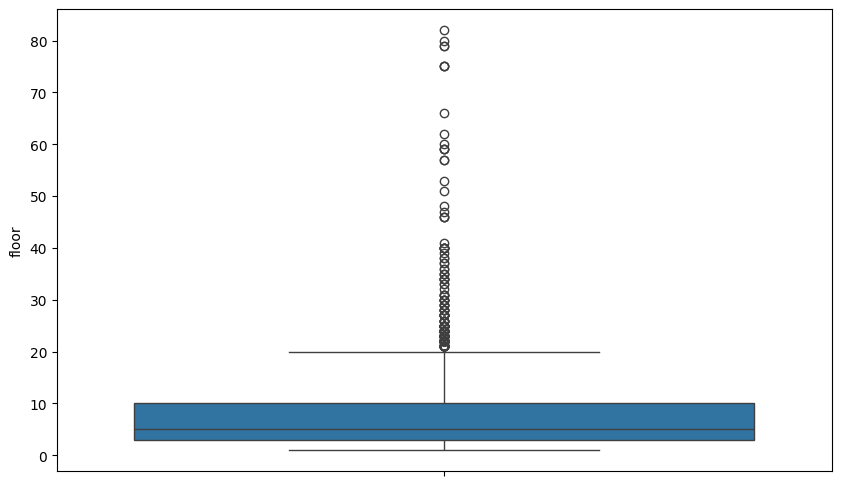

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df)

plt.show()

In [41]:
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['floor'] >= lower_bound) & (df['floor'] <= upper_bound)]

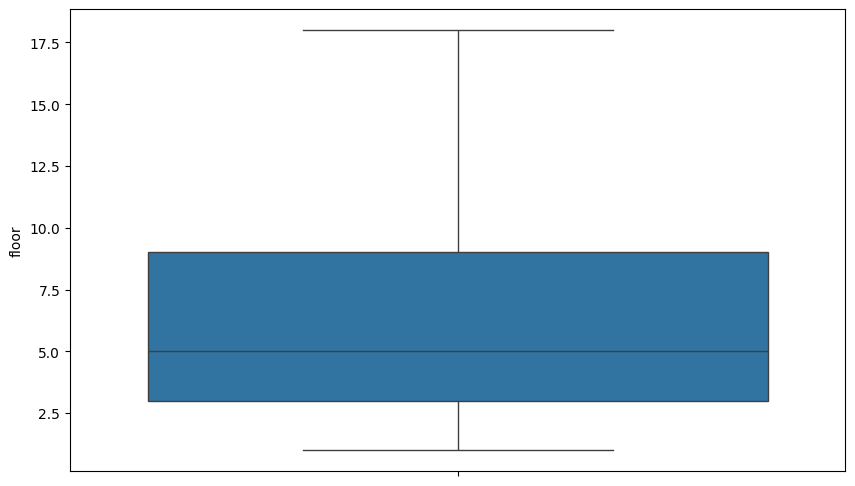

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df)

plt.show()

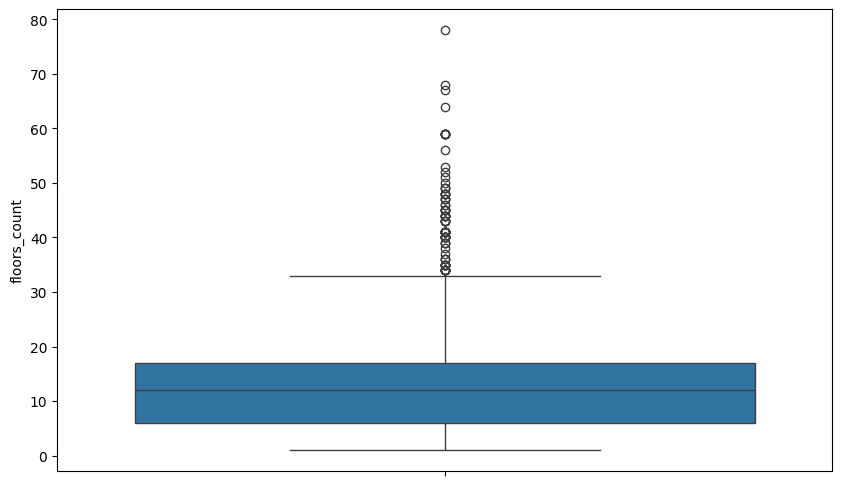

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df)

plt.show()

In [44]:
Q1 = df['floors_count'].quantile(0.25)
Q3 = df['floors_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['floors_count'] >= lower_bound) & (df['floors_count'] <= upper_bound)]

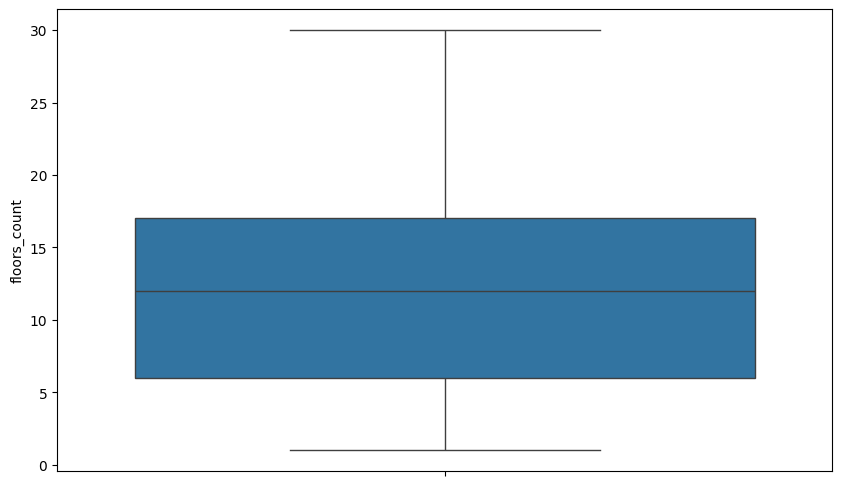

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df)

plt.show()

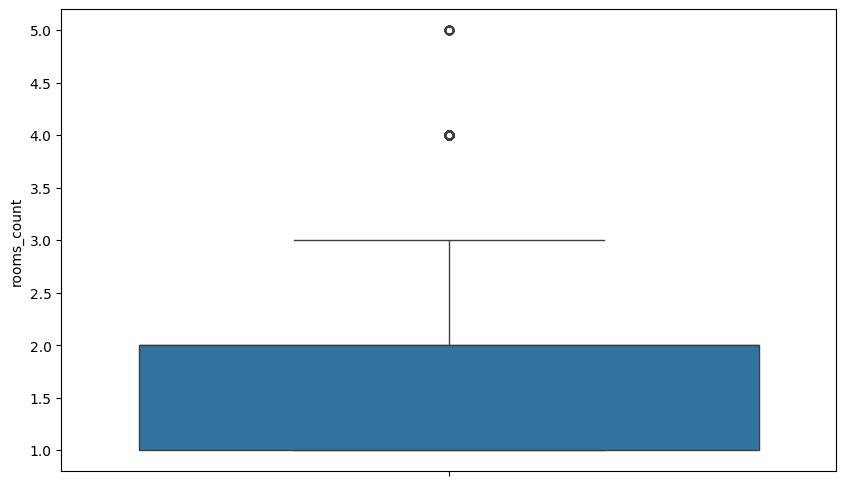

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df)

plt.show()


In [47]:
Q1 = df['rooms_count'].quantile(0.25)
Q3 = df['rooms_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['rooms_count'] >= lower_bound) & (df['rooms_count'] <= upper_bound)]

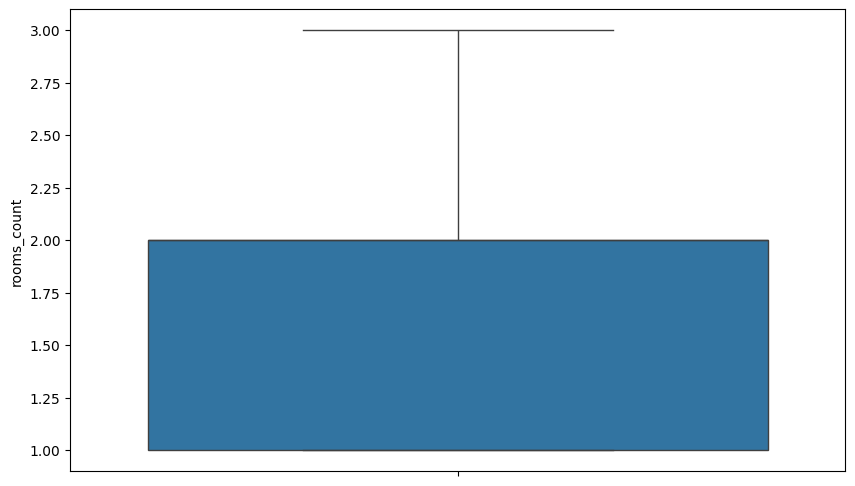

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df)

plt.show()

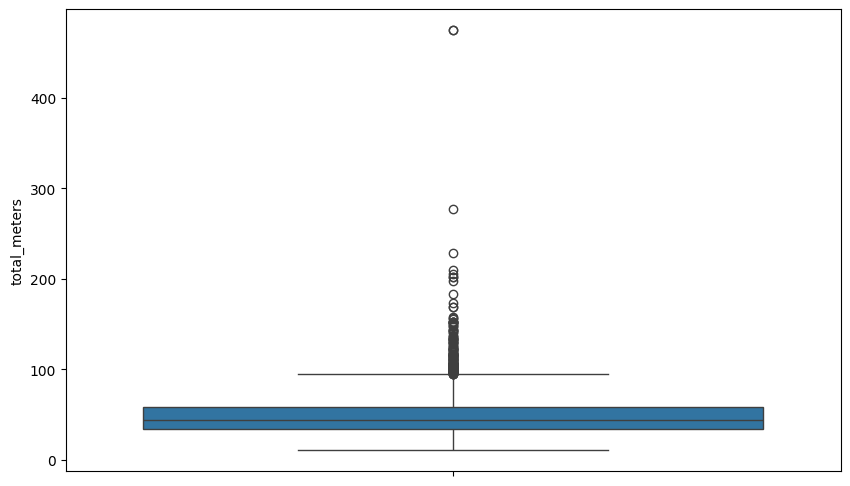

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df)

plt.show()

In [50]:
Q1 = df['total_meters'].quantile(0.25)
Q3 = df['total_meters'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['total_meters'] >= lower_bound) & (df['total_meters'] <= upper_bound)]


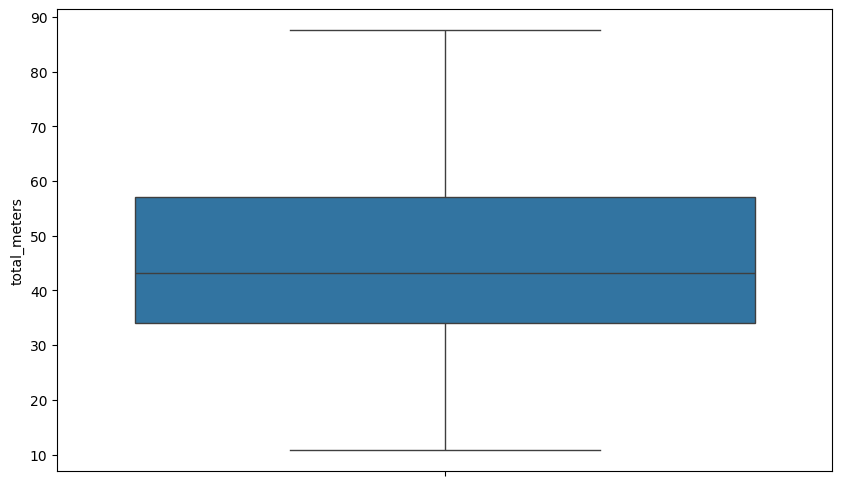

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df)

plt.show()


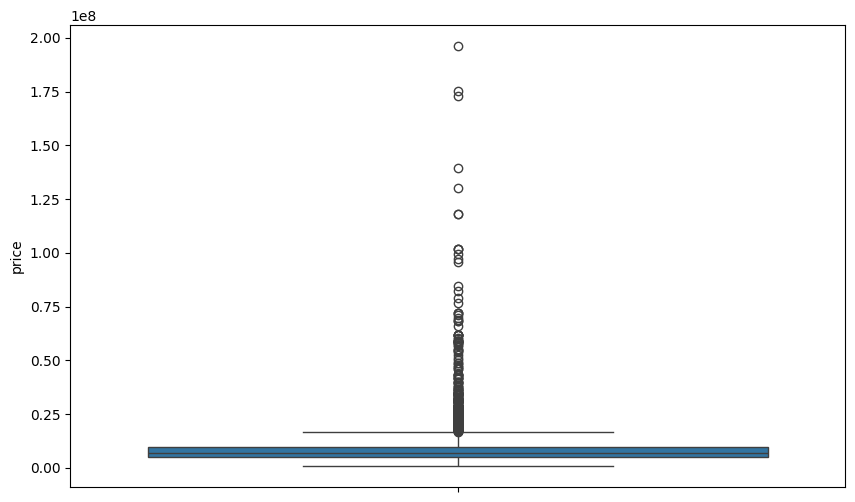

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)

plt.show()

In [53]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


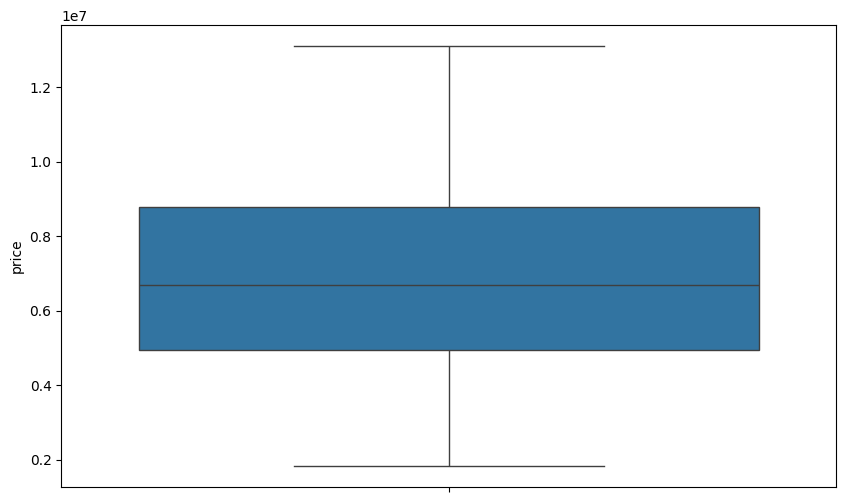

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)

plt.show()

Проанализируем кол-во квартир по кол-ву комнат

In [55]:
df.to_csv('updated5_file.csv', index=False)

In [56]:

df = pd.read_csv('updated5_file.csv')

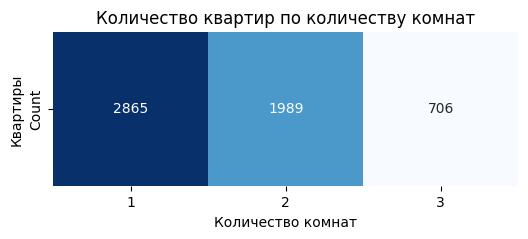

In [57]:

room_counts = df['rooms_count'].value_counts().sort_index()
room_counts_df = room_counts.reset_index()
room_counts_df.columns = ['Rooms', 'Count']

plt.figure(figsize=(6, 2))
sns.heatmap(room_counts_df.set_index('Rooms').T, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title("Количество квартир по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Квартиры")

plt.show()


Рассмотрим распределение цен на недвижимость и зависимость цены от общей площади

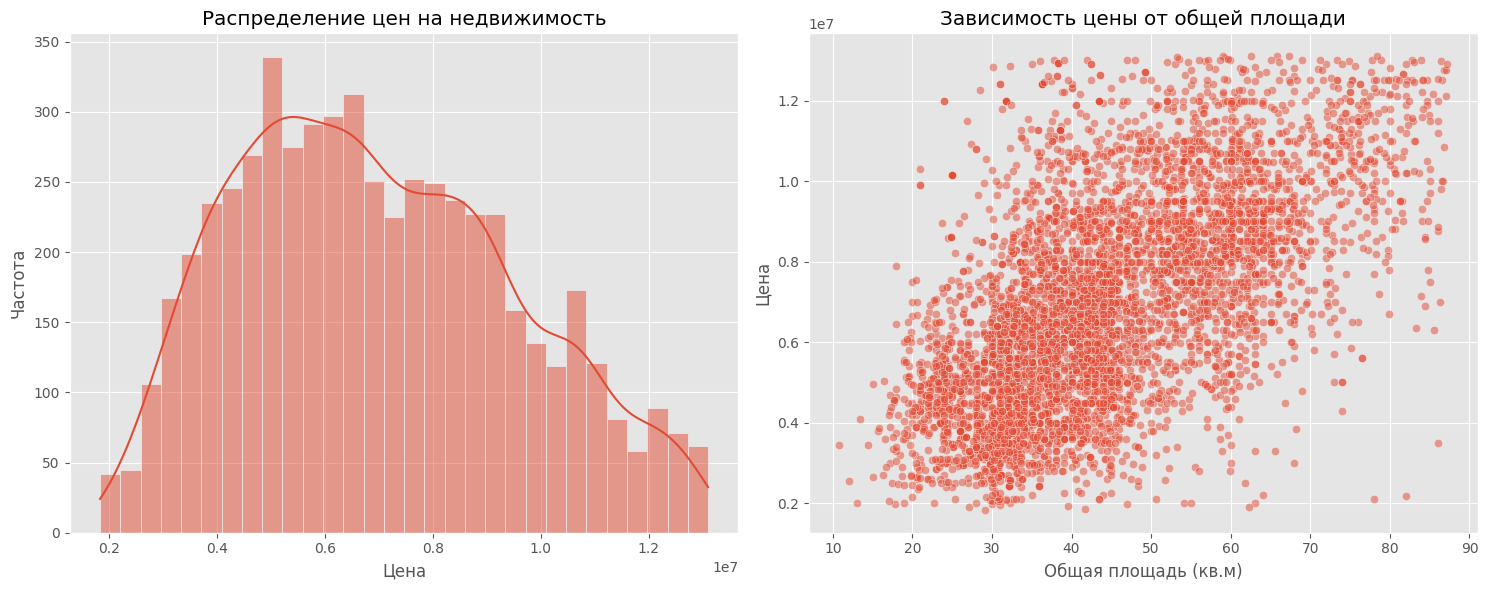

In [58]:

plt.style.use("ggplot")  

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='total_meters', y='price', alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()


Рассмотрим  цену по этажности и их связь

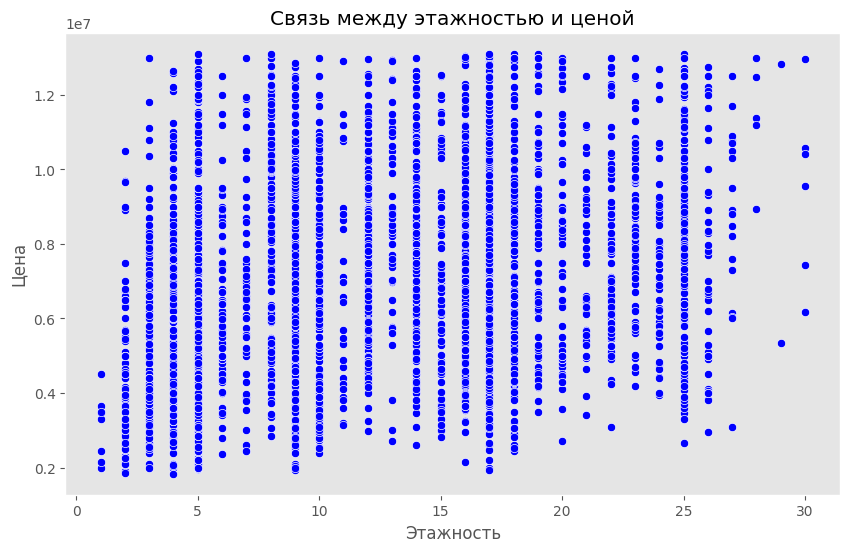

/tmp/ipykernel_9222/1273227963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floors_count', y='price', data=df, palette='Set2')


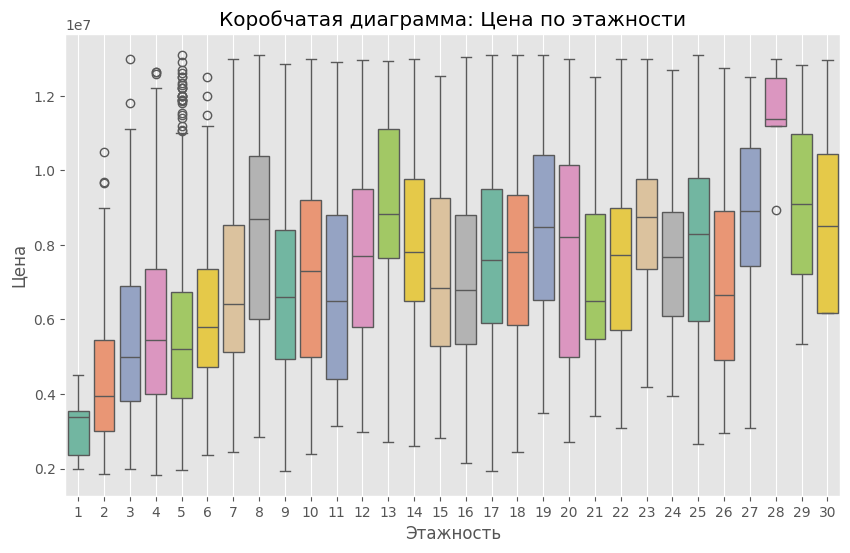

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floors_count', y='price', data=df, color='blue')
plt.title('Связь между этажностью и ценой')
plt.xlabel('Этажность')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='floors_count', y='price', data=df, palette='Set2')
plt.title('Коробчатая диаграмма: Цена по этажности')
plt.xlabel('Этажность')
plt.ylabel('Цена')
plt.grid()
plt.show()

/tmp/ipykernel_9222/137619679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parking_type', y='price', data=df, palette='Set2')


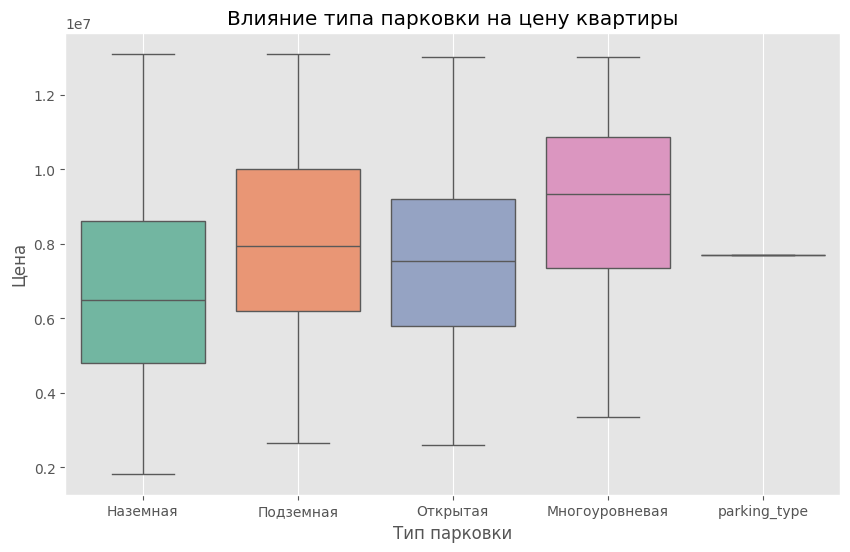

/tmp/ipykernel_9222/137619679.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='floor', y='price', data=df, palette='Set3', s=100)


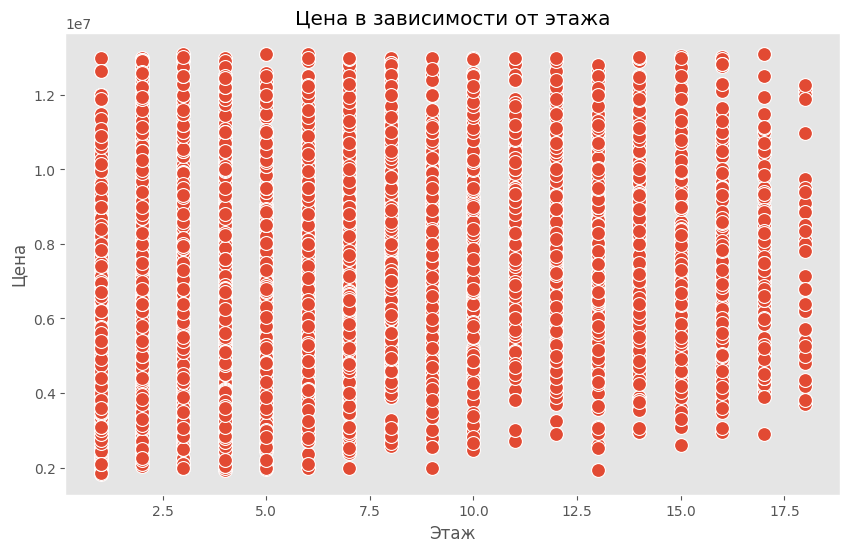

/tmp/ipykernel_9222/137619679.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_meters', y='price', data=df, palette='Set4', s=100)


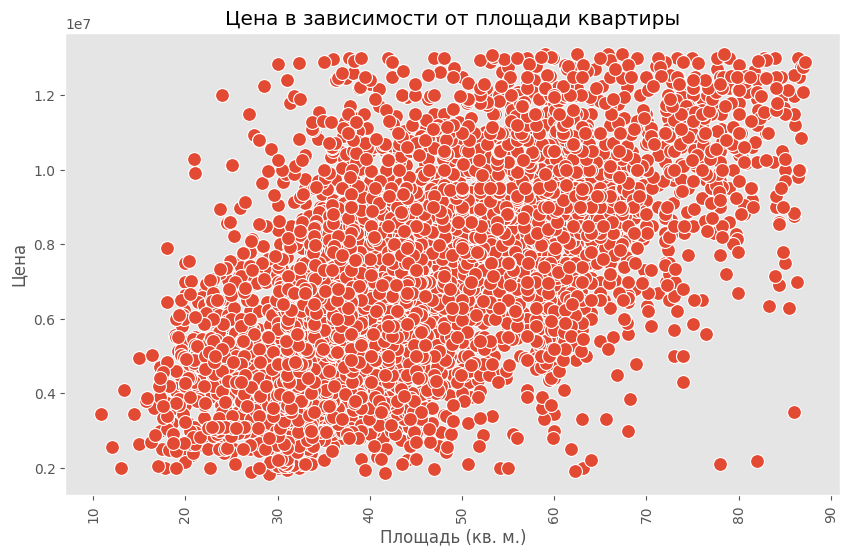

In [60]:
df = pd.read_csv('updated5_file.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='parking_type', y='price', data=df, palette='Set2')
plt.title('Влияние типа парковки на цену квартиры')
plt.xlabel('Тип парковки')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor', y='price', data=df, palette='Set3', s=100)
plt.title('Цена в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_meters', y='price', data=df, palette='Set4', s=100)
plt.title('Цена в зависимости от площади квартиры')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.grid()
plt.show()

/tmp/ipykernel_9222/3088143844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')


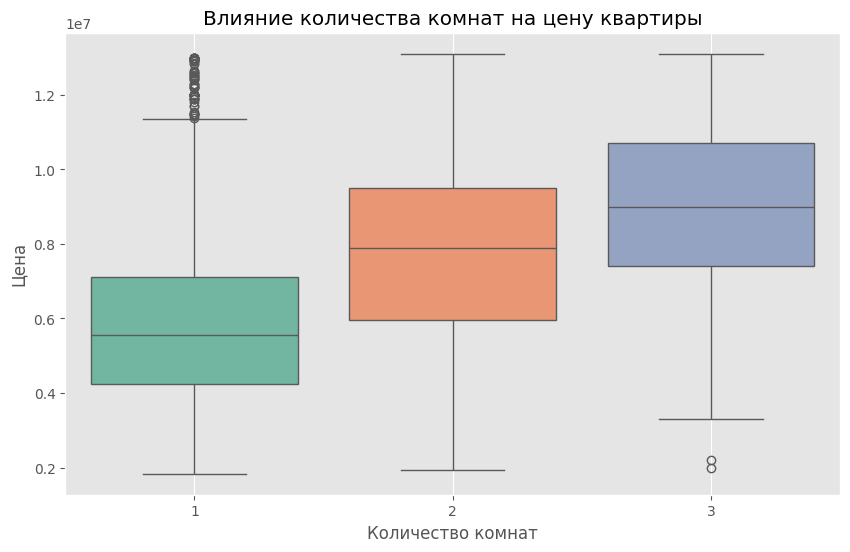

/tmp/ipykernel_9222/3088143844.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='year_of_construction', y='price', data=df, palette='Set1', s=100)


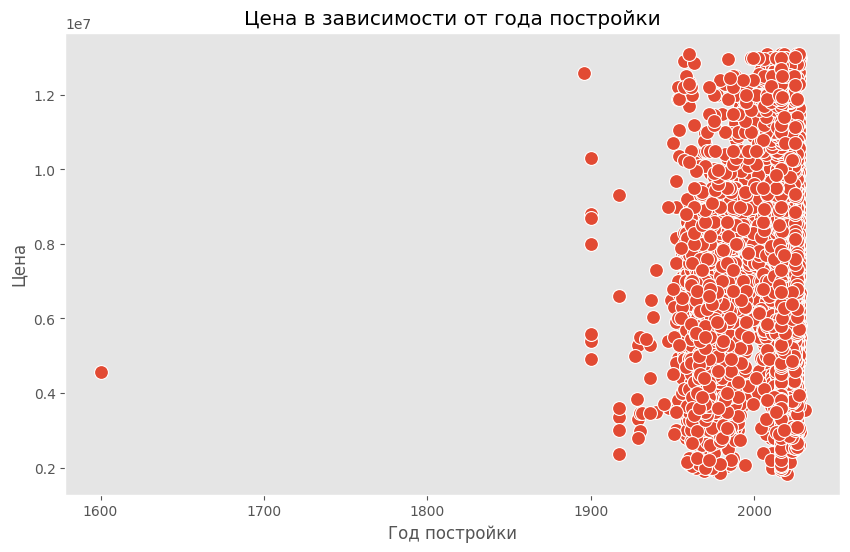

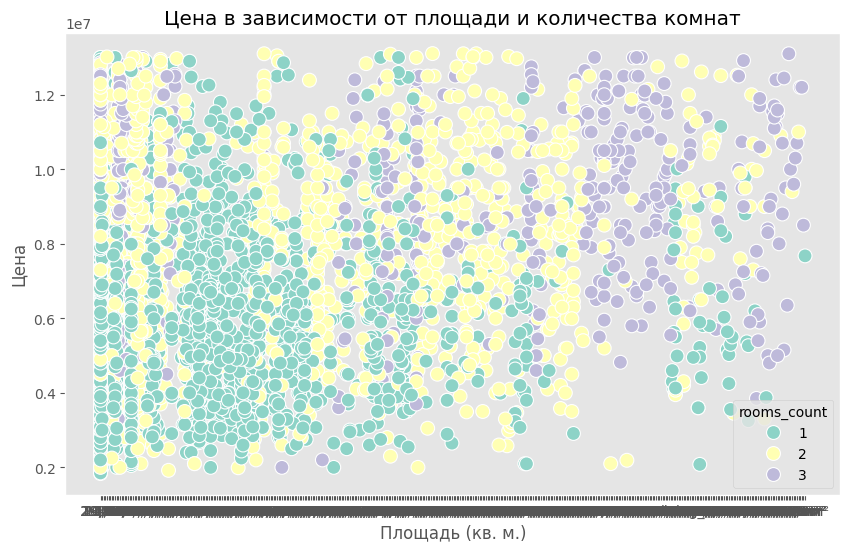

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')
plt.title('Влияние количества комнат на цену квартиры')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_of_construction', y='price', data=df, palette='Set1', s=100)
plt.title('Цена в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_meters', y='price', hue='rooms_count', data=df, palette='Set3', s=100)
plt.title('Цена в зависимости от площади и количества комнат')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Цена')
plt.grid()
plt.show()

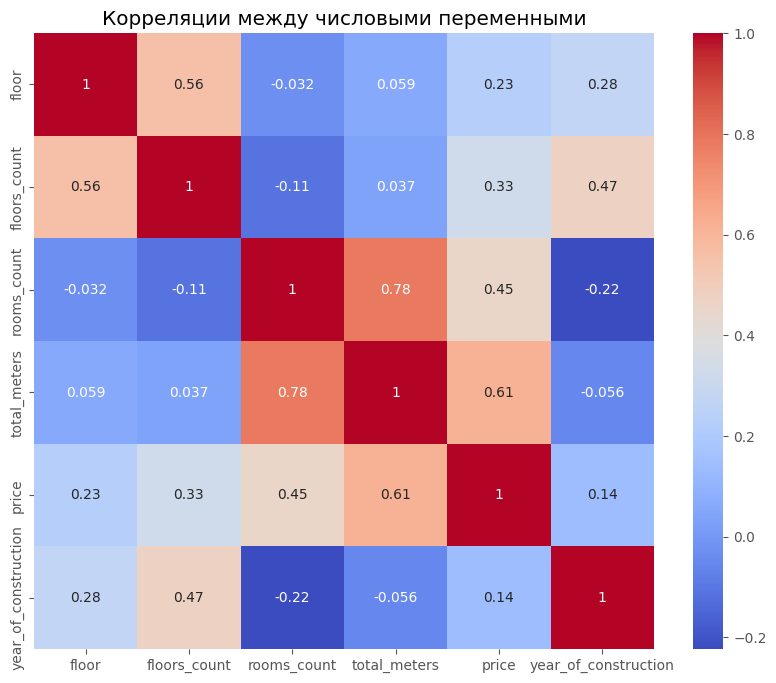

In [62]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()